In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [2]:
df=pd.read_csv(r'/users/pawarbharath/downloads/Womens Clothing E-Commerce Reviews.csv')

In [3]:
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [4]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
#here the un named  column is added we can drop
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [7]:
len(df.columns)

10

In [8]:
df.shape

(23486, 10)

In [9]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
#check the null values 
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

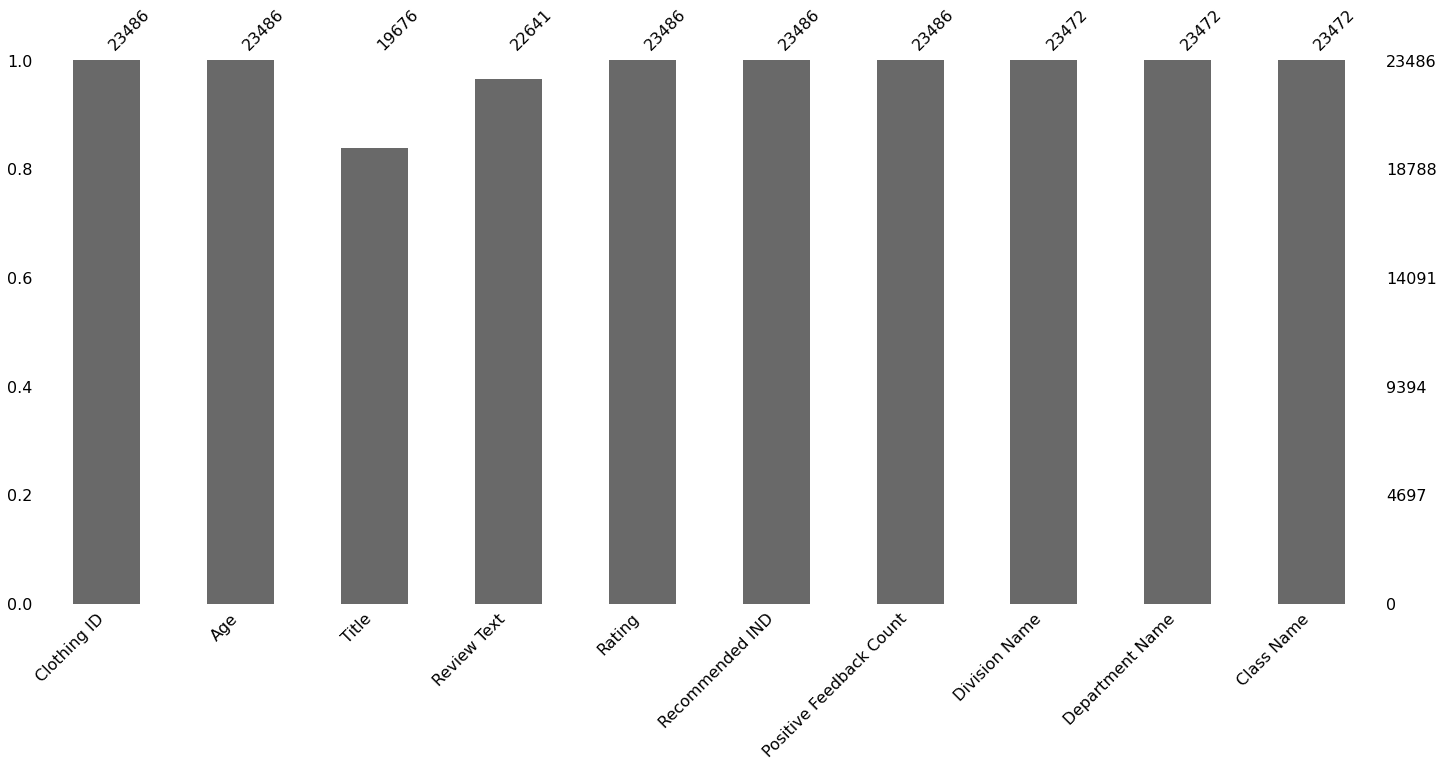

In [11]:
msno.bar(df)
#glance of the data

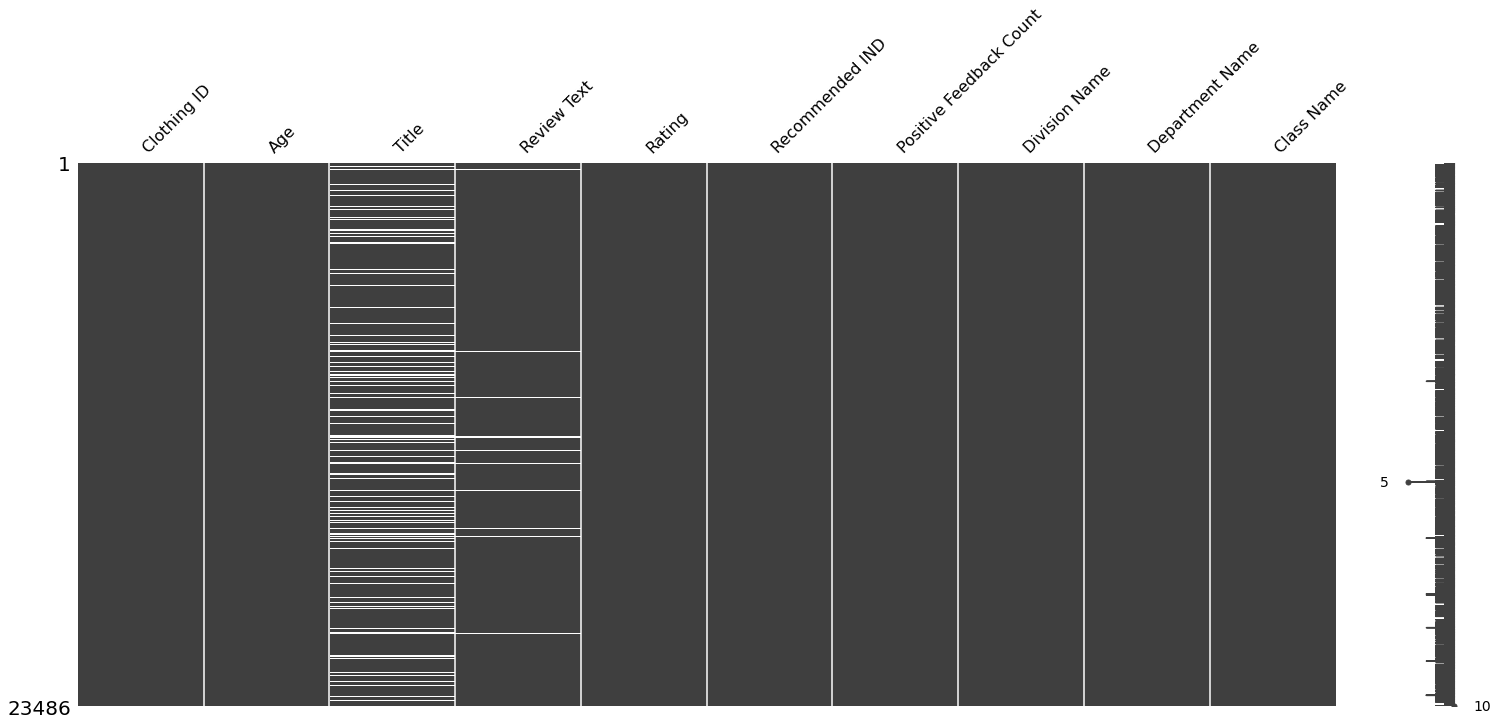

In [12]:
#matrix form
msno.matrix(df)

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

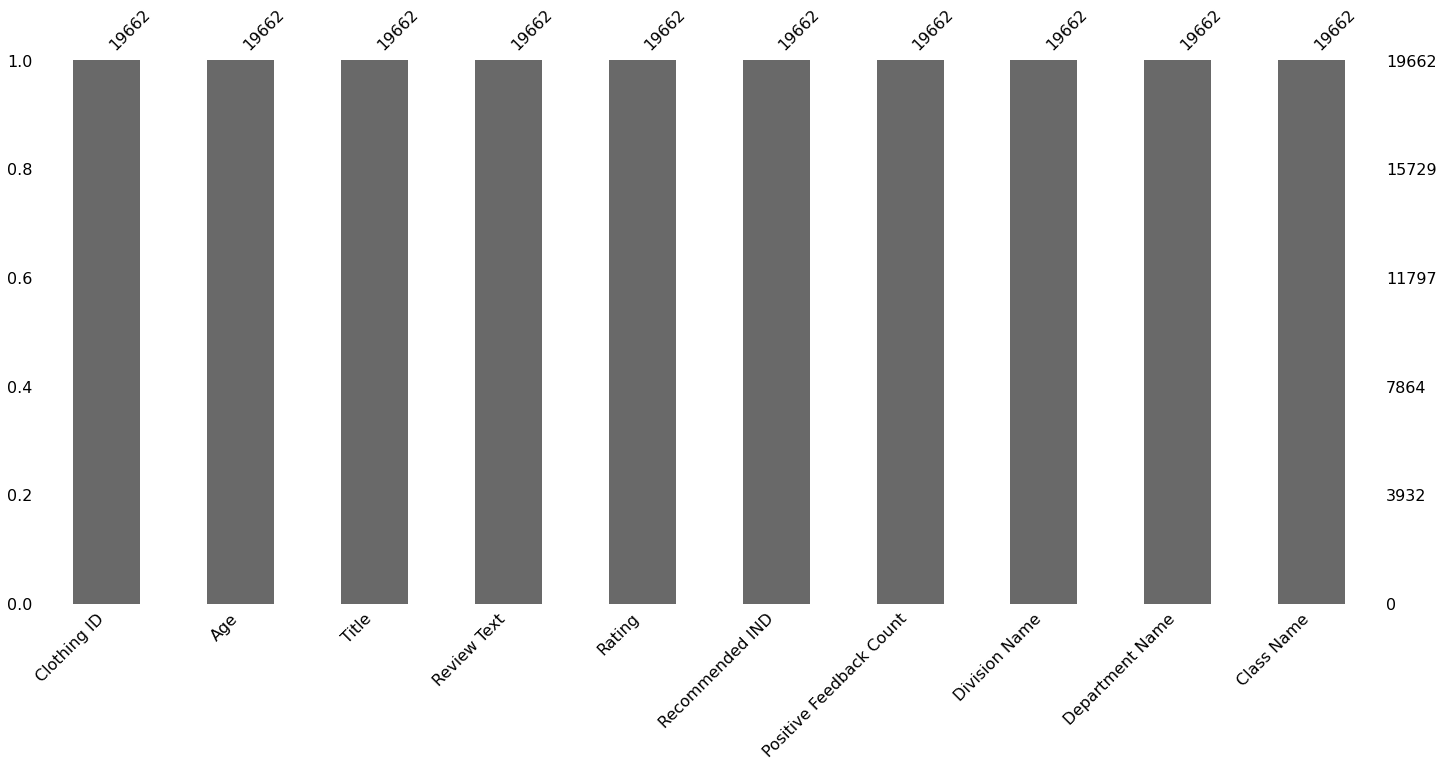

In [15]:
msno.bar(df)

In [16]:
df.shape

(19662, 10)

In [17]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [18]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [19]:
#re arrange the index number to start from 0
df.reset_index(inplace = True)

In [20]:
df.head(2)

,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [21]:
df=df.drop(['index'],axis=1)

In [22]:
df.shape

(19662, 10)

In [23]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


In [24]:
df['Age'].unique()

array([60, 50, 47, 49, 39, 24, 34, 53, 44, 41, 32, 33, 55, 31, 28, 46, 21,
       36, 65, 38, 23, 67, 48, 43, 56, 66, 61, 52, 57, 40, 37, 27, 62, 68,
       51, 83, 69, 54, 64, 42, 30, 35, 26, 63, 29, 25, 45, 59, 74, 70, 58,
       22, 20, 71, 80, 93, 82, 72, 77, 85, 73, 78, 79, 19, 84, 75, 76, 81,
       90, 86, 89, 99, 18, 91, 92, 94, 87])

In [25]:
df['Rating'].unique()

array([3, 5, 2, 4, 1])

In [26]:
df['Recommended IND'].unique()

array([0, 1])

In [27]:
df['Positive Feedback Count'].unique()

array([  0,   6,   4,   1,  14,   2,   3,   7,   9,  34,  10,   5,  17,
        11,  24,  12,   8,  13,  16,  15,  20,  19,  29,  32,  30,  55,
        84,  27,  43,  42,  37,  35,  65,  33,  21,  18,  25,  47,  51,
        94,  31,  77,  23,  61,  46,  26,  28,  22,  57,  45,  66,  82,
        44,  81,  58,  78,  38,  49,  52, 122,  41, 108,  54,  40,  36,
        53,  87,  64,  89,  68,  98,  95,  39,  93,  48,  99,  50,  69,
        59])

In [28]:
df['Department Name'].unique()

array(['Dresses', 'Bottoms', 'Tops', 'Intimate', 'Jackets', 'Trend'],
      dtype=object)

In [29]:
df['Class Name'].unique()

array(['Dresses', 'Pants', 'Blouses', 'Knits', 'Intimates', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Shorts', 'Legwear', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.5+ MB


[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Age Distribution')]

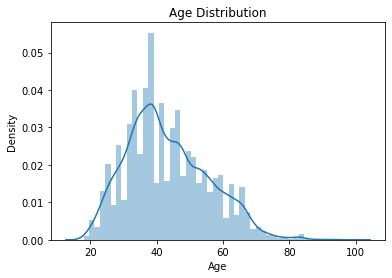

In [31]:
sns.distplot(df.Age).set(title="Age Distribution" , xlabel="Age", ylabel="Density")



[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'Positive Feedback Count'),
 Text(0.5, 1.0, 'Positive Feedback Count Distribution')]

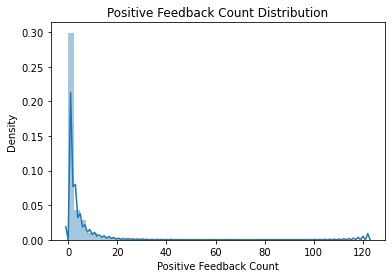

In [32]:
sns.distplot(df['Positive Feedback Count']).set(title="Positive Feedback Count Distribution" , xlabel="Positive Feedback Count", ylabel="Density")



[Text(0, 0.5, 'Density'),
 Text(0.5, 0, 'log Positive Feedback Count'),
 Text(0.5, 1.0, 'Positive Feedback Count Distribution log[10]')]

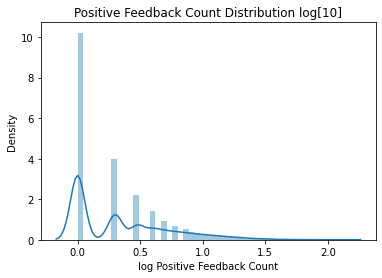

In [33]:
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+1))).set(title="Positive Feedback Count Distribution log[10]" , 
                xlabel="log Positive Feedback Count", ylabel="Density")




In [34]:


Interpretation: 

Distribution of Age: 
My a priori expectation was that the biggest group of reviewing customers would be young, 
tech savvy women between the age of 18 and 34. However, this plot would say otherwise, 
since it appears that not only is the 34 to 50 year old age most engage in reviewing products,
they also appear to be the most positive reviewers, since they proportionately give higher more reviews of 5. 
Before making insight about these point, it would be wise to gather further data on the age distribution of shoppers.
Nevertheless, this trend suggest that the core market segment for this clothing brand is women between 34 and 50.
With its single peak and slight right tail, the distribution of age is more or less normal.



SyntaxError: invalid syntax (<ipython-input-34-a20fceb82856>, line 1)

In [54]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Text(0, 0.5, 'category')

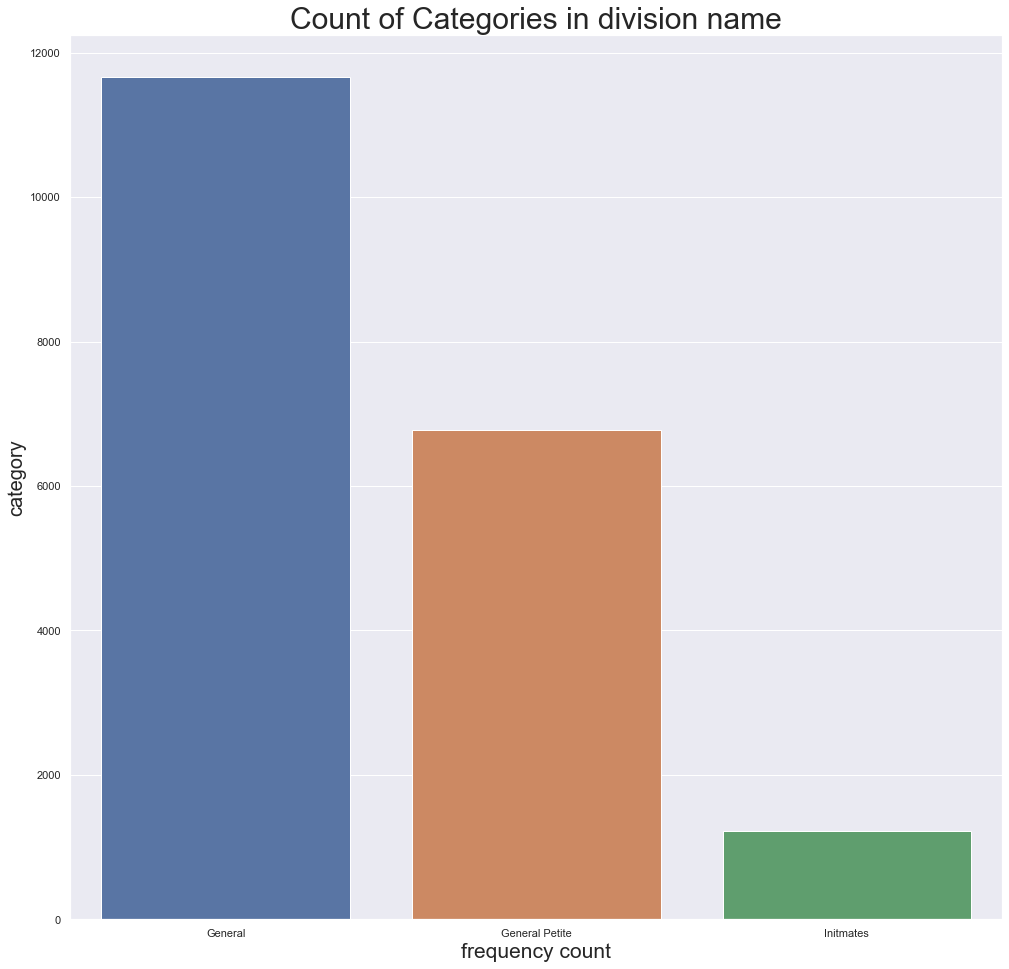

In [55]:
ax = sns.countplot(x="Division Name", data=df)
ax.set_xlabel("frequency count",size=21)
ax.set_title("Count of Categories in division name",size=30)
ax.set_ylabel("category",size=20)




Text(0, 0.5, 'category')

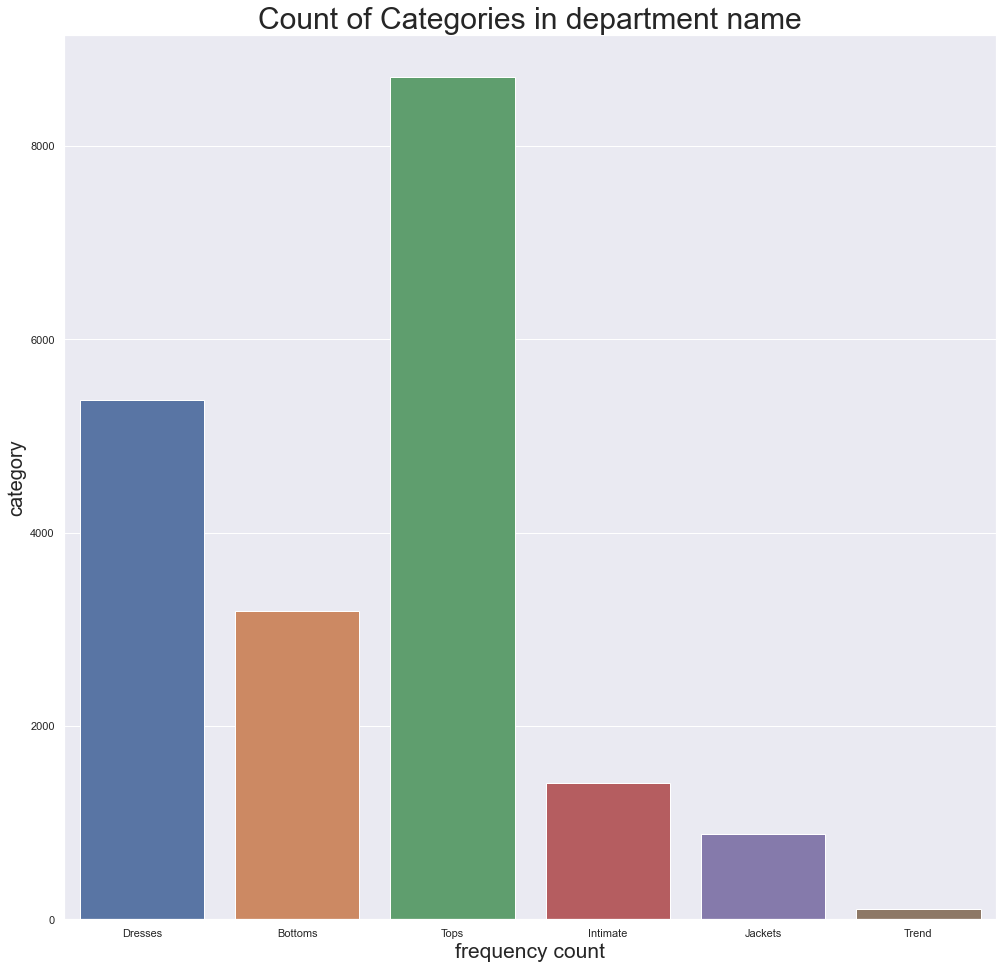

In [57]:
ax = sns.countplot(x="Department Name", data=df)
ax.set_xlabel("frequency count",size=21)
ax.set_title("Count of Categories in department name",size=30)
ax.set_ylabel("category",size=20)



In [36]:
Interpretation: 


Distribution of Division Name 
This high level feature describes had three categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

Distribution of Department Name 
It is notable to observe that Tops and Dresses are the most commonly reviewed products. It would be interesting to investigate the motivation of leaving a review in the first place.



SyntaxError: invalid syntax (<ipython-input-36-94daa45cc75e>, line 1)

In [58]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants


Text(0, 0.5, 'class name')

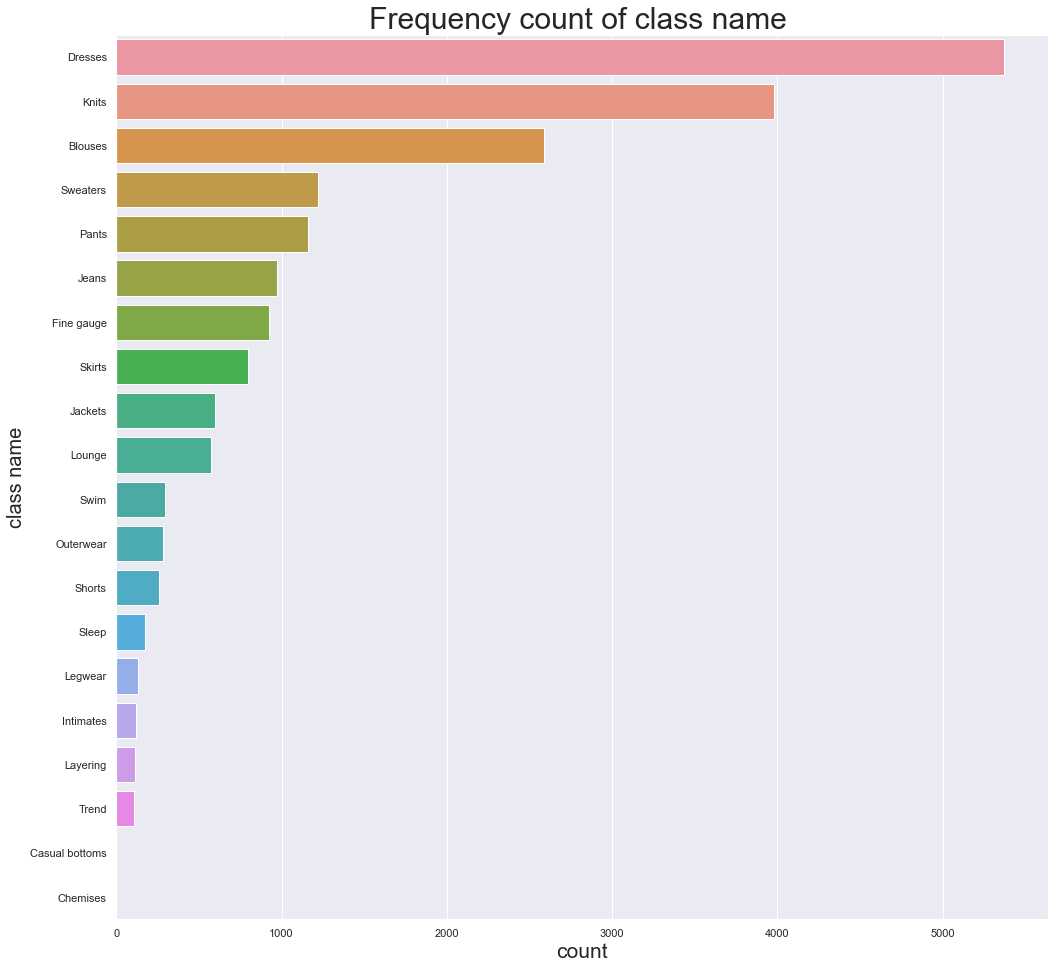

In [59]:
ax=sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
ax.set_xlabel("count",size=21)
ax.set_title("Frequency count of class name ",size=30)
ax.set_ylabel("class name",size=20)




In [39]:
Interpretation: 
Exploring the class variable suggests that the most popular clothing types are: 
    
Dresses and  Blouses,knits and Sweters. The distribution of reviews is fairly constant, 
Casual bottoms and Chemises scored the highest in this criteria with a 100% positive review rate, 
however upon investigation this is because only 4 reviews were made in these categories.



SyntaxError: invalid syntax (<ipython-input-39-c29cab710a09>, line 1)

Text(0, 0.5, 'Occurance')

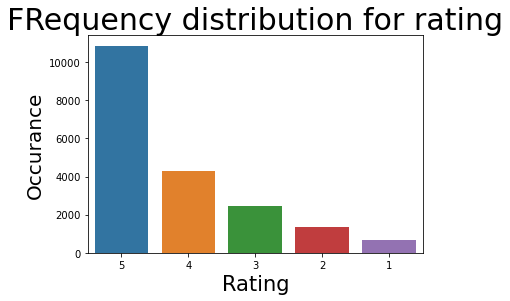

In [40]:
ax = sns.countplot(x="Rating", data=df,order=df["Rating"].value_counts().index)
ax.set_xlabel("Rating",size=21)
ax.set_title("FRequency distribution for rating",size=30)
ax.set_ylabel("Occurance",size=20)

Text(0, 0.5, 'Occurance')

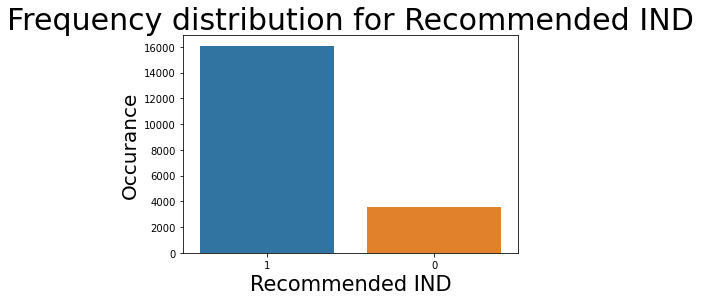

In [41]:
ax = sns.countplot(x="Recommended IND", data=df,order=df["Recommended IND"].value_counts().index)
ax.set_xlabel("Recommended IND",size=21)
ax.set_title("Frequency distribution for Recommended IND",size=30)
ax.set_ylabel("Occurance",size=20)

In [42]:

Interpretation: 


Distribution of Rating: 
The vast majority of reviews were highly positive, with a score of five out of five.
This suggests that this retail store is performing fairly well, but then again, 
I am not familiar with the industry benchmark. Competitor reviews may be scraped and analyzed. 
It is important to note that these reviews are subjective, and some negative reviews may a outcome of a bad day,
instead of constructive feedback.

SyntaxError: invalid syntax (<ipython-input-42-4a29ee22efaf>, line 1)

In [43]:
Distribution of Recommended IND: 
This variable mirrors the positivity of the Rating distribution, but as mentioned earlier, 
I believe that it provides variation of positivity which is social, rather than personal.

SyntaxError: invalid syntax (<ipython-input-43-1758568260fa>, line 1)

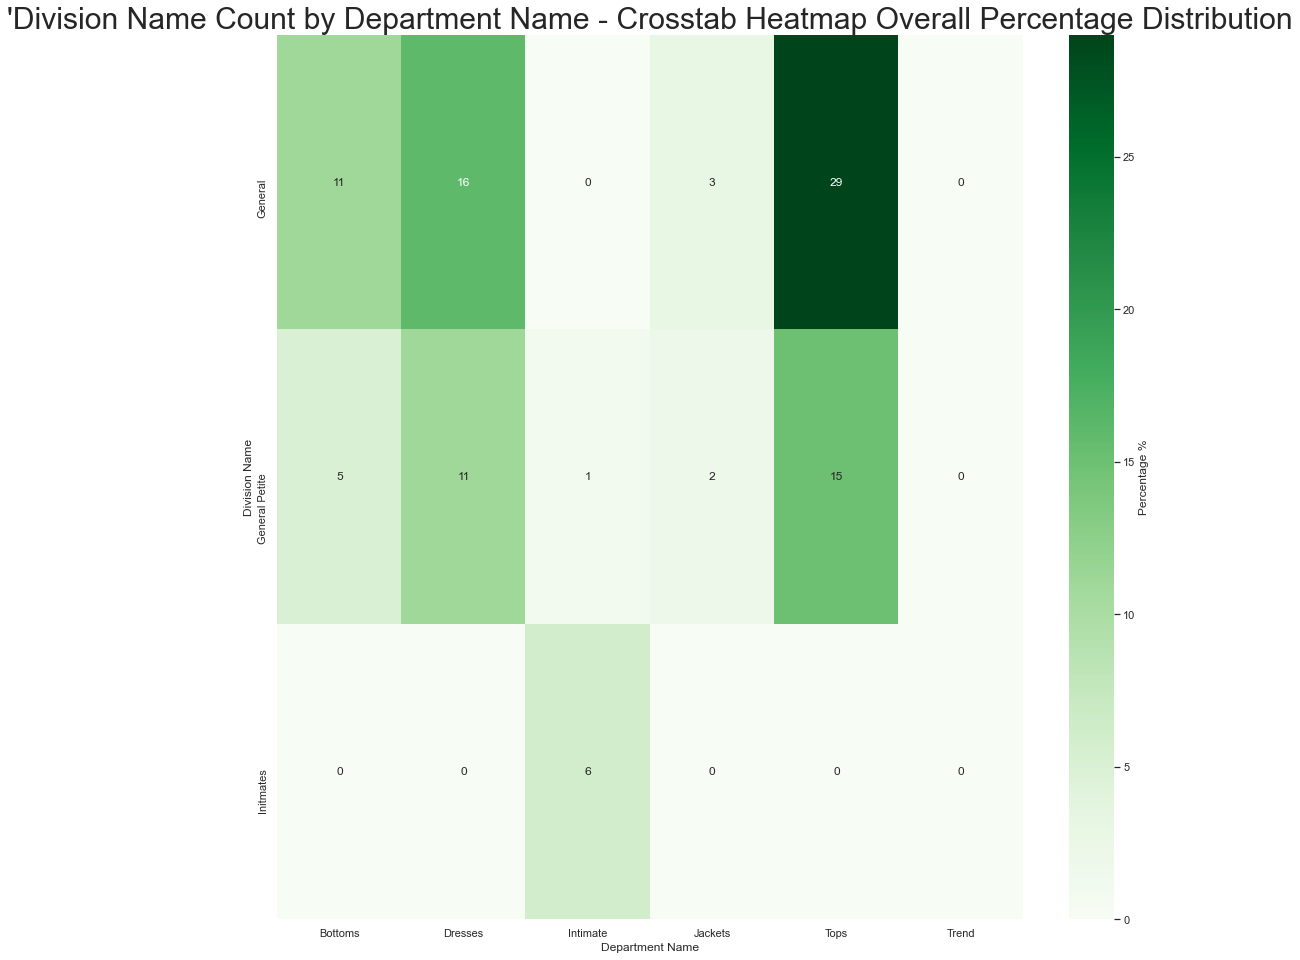

In [60]:
ax=sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax.set_title("'Division Name Count by Department Name - Crosstab Heatmap Overall Percentage Distribution",size=30)


sns.set(rc={'figure.figsize':(11.7,8.27)})

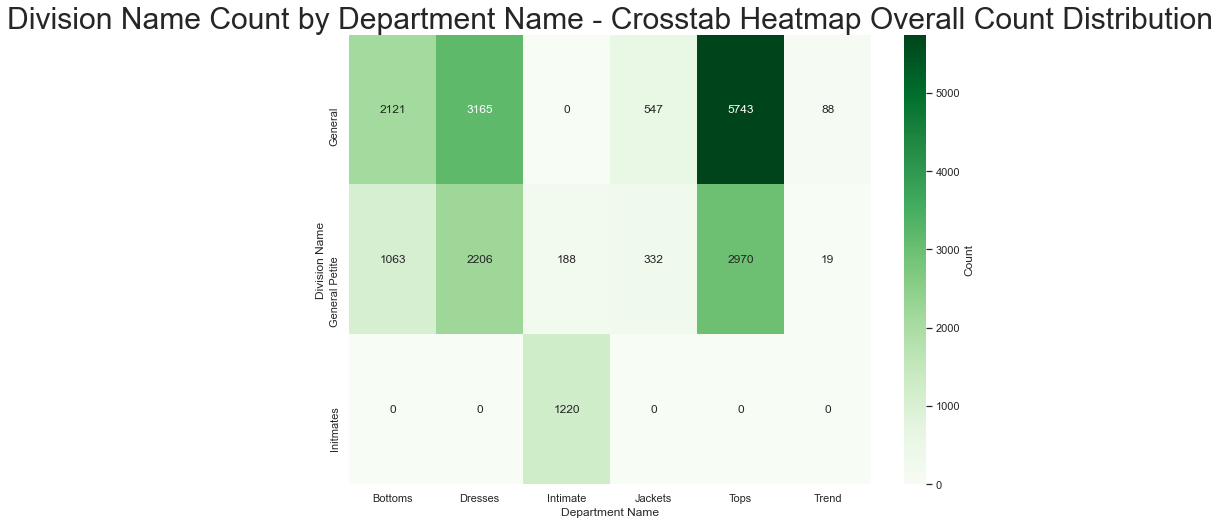

In [61]:
ax=sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"]),
            annot=True,fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax.set_title("Division Name Count by Department Name - Crosstab Heatmap Overall Count Distribution",size=30)

sns.set(rc={'figure.figsize':(11.7,8.27)})



In [46]:
How to Interpret: 
For the first heatmap , the percentages occurrence is in relation to the both heat maps.

Interpretation: 
Evidently, the most common product is a normal sized top.

SyntaxError: invalid syntax (<ipython-input-46-25ff9315d12f>, line 1)

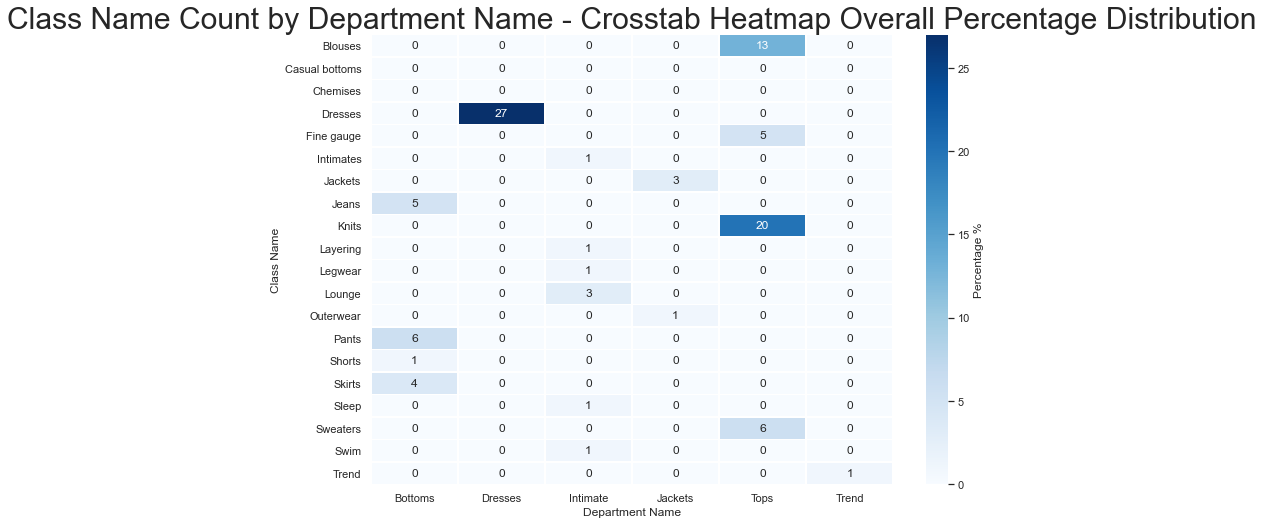

In [53]:
ax=sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5,fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})

ax.set_title("Class Name Count by Department Name - Crosstab Heatmap Overall Percentage Distribution",size=30)

sns.set(rc={'figure.figsize':(16.7,16.27)})



In [ ]:
ax=sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]),
            annot=True, linewidths=.5,fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax.set_title("Class Name Count by Department Name - Crosstab Heatmap Overall Count Distribution",size=30)

sns.set(rc={'figure.figsize':(16.7,16.27)})



In [47]:
Interpretation: 
Here we get a closer glimpse at the breakdown of specific clothing types. Up to now, 
the dominance of dress popularity has been evident, but not that of "Knits". 
This is a kind of thickly thread and colorful top item which I must confess I have not seen much of out in the real world.

SyntaxError: invalid syntax (<ipython-input-47-085aaa7dbbfc>, line 1)

Text(0.5, 1.0, 'Class Name Count by Division Name - Crosstab Heatmap Overall Count Distribution')

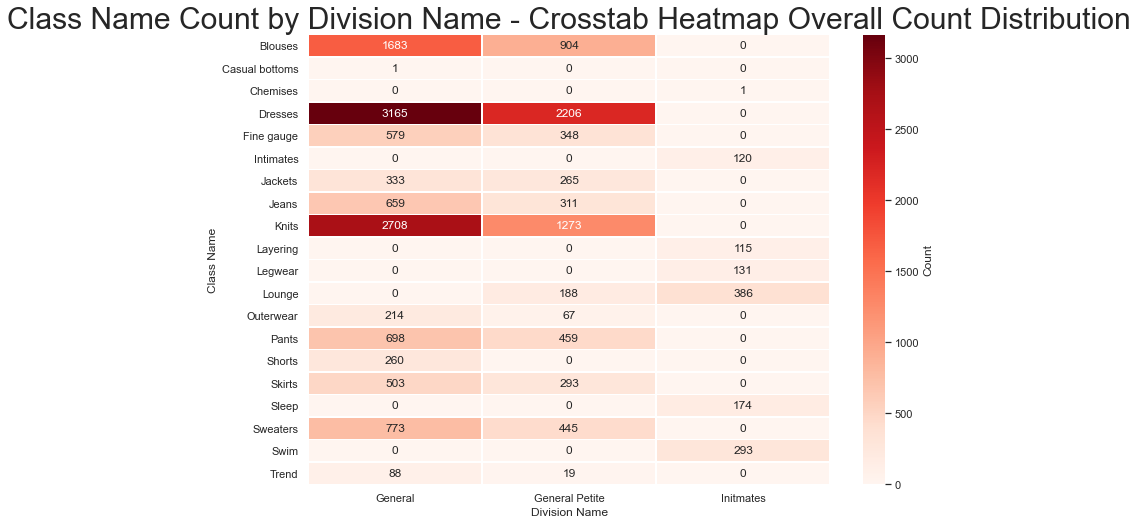

In [48]:
ax=sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True, linewidths=.5,fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax.set_title("Class Name Count by Division Name - Crosstab Heatmap Overall Count Distribution",size=30)



Text(0.5, 1.0, 'Class Name Count by Division Name - Crosstab Heatmap Overall percentage Distribution')

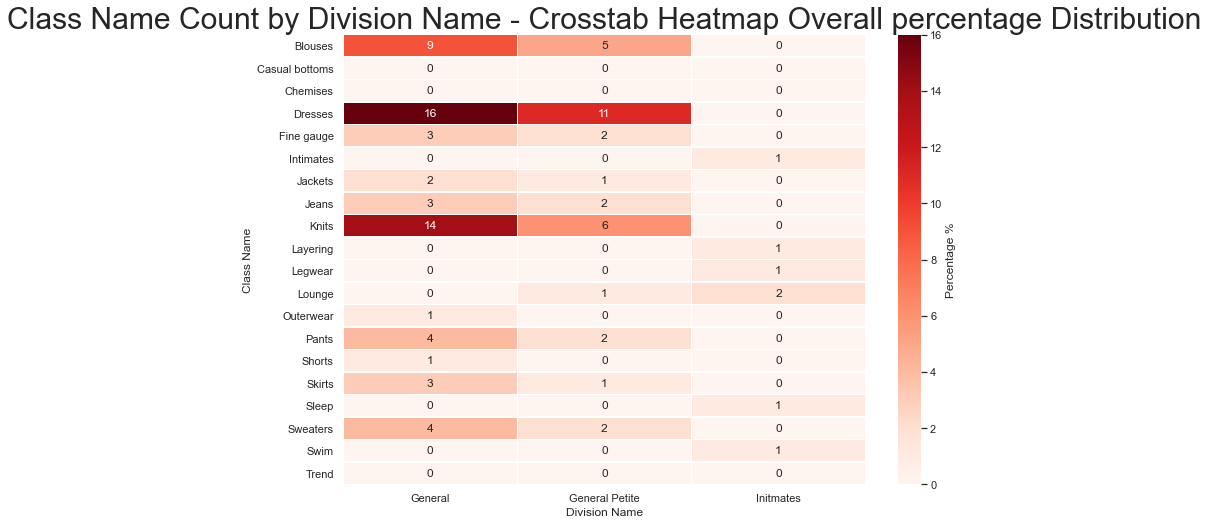

In [49]:
ax=sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})

ax.set_title("Class Name Count by Division Name - Crosstab Heatmap Overall percentage Distribution",size=30)



In [50]:
Interpretation: 
I think this plot wraps up the interplay between Blouses, Dresses, 
and Knits by showing that most reviews revolve around the normal sized version of the products. 
It is interesting to note that Dresses attract higher proportion of "Petite" sized customers.

SyntaxError: invalid syntax (<ipython-input-50-d66cc895efef>, line 1)

In [ ]:
df.columns

In [62]:
ratingmean=df.groupby(["Clothing ID"])["Rating"].mean()


In [63]:
ratingmean

Clothing ID
1       4.000000
2       4.000000
4       5.000000
5       5.000000
7       5.000000
          ...   
1200    3.000000
1202    4.333333
1203    4.428571
1204    4.500000
1205    5.000000
Name: Rating, Length: 1095, dtype: float64

In [64]:
recommendmean=df.groupby(["Clothing ID"])['Recommended IND'].mean()

In [65]:
recommendmean

Clothing ID
1       0.666667
2       1.000000
4       1.000000
5       1.000000
7       1.000000
          ...   
1200    0.000000
1202    1.000000
1203    0.714286
1204    1.000000
1205    1.000000
Name: Recommended IND, Length: 1095, dtype: float64

Text(0.5, 0.98, 'Rating Mean and Recommended Mean\nGrouped by Clothing ID')

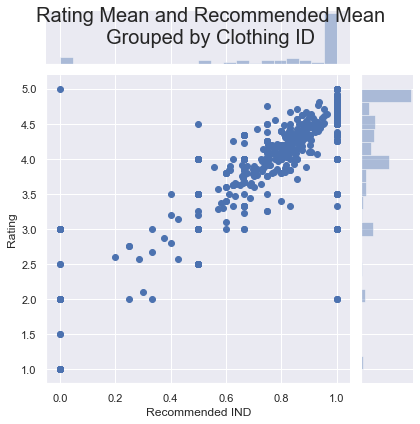

In [66]:
g=sns.jointplot(x=recommendmean,y=ratingmean)
g.fig.suptitle("Rating Mean and Recommended Mean\nGrouped by Clothing ID",size=20)



In [67]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
Interpretation: 
Here is a closer look at this correlation of interest
perhaps the dots are the bottom left could be the products that unarguably need attention from the retailer, 
in the hope of preserving brand image.

In [52]:
Working with Text 
Now that a general understanding of the variables have been laid out, I will begin to analysis the customer reviews.

Text Pe-Processing

SyntaxError: invalid syntax (<ipython-input-52-30572460e866>, line 1)

In [243]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
5038,Simple and elegant,I thought this shirt was really feminine and elegant. only downsides is some of the punched out holes had fabric still attached which you have cut off with scissors- otherwise the shirt will snag. and the second issue of bigger importance are the low armholes. lots of bra showing- not really sure how to get around that so i always wear it with a cardigan. but it would be nice not to have to. \r\nother than that it looks nice and pairs nicely with almost anything.,5
17042,My new favorite dress,"Got this dress in the blue and cream and it's gorgeous. i love that it's work and date night appropriate, but so comfy. i am 5'4"" but have very short legs, so it's hard to find a maxi dress or skirt that doesn't drag on the ground. this floats beautifully above my ankles - a little lower than on the model, but still high enough that i am totally comfortable wearing the dress without heels. i got the small and it fits great. the print is lovely - the cream fabric is speckled in gray dots in some",5
17142,Too itchy,"I was excited to order this sweater. when it arrived, the green didn't stand out as much as the picture here. it also felt too itchy. i usually wear either very soft wool or wool with cashmere because i can't stand plain thick heavy wool. this one was just too itchy for me, it is going back.",3
12184,Meh,"I wanted to love this top, but had 2 major problems with it. first, it's not for short girls. i'm only 5' tall and it was a total mess on me proportion wise. the sleeves were way too long and the seam where the sweater and peplum meet hit right in the middle of my butt, which was terribly unflattering. second, the grey fabric was very thin and kinda cheap looking. no regrets on returning this one.",3
7132,Great classic skirt,"This skirt is great, a classic. the little dots on the skirt give it some character while remaining a simple black and flattering skirt. the material lays nicely and flat. it does not make me look like i have a stomach. the skirt fits tts. i am a little afraid that the waistband will stretch out over time so i might exchange it for one size smaller. overall, i love the skirt!",5
12315,Luisa swing dress,Love this dress! the color is gorgeous! what you don't see until you see the dress in person is the beautiful detail of the stitched flowers on the dress. i received so many compliments when i wore this dress. the sleeves are sheer and the material light weight. you can wear this dress year round. i love these kind of dresses! retailer knows how to do this right! love this store!,5
14747,Adorable dress!,"This dress is adorable! i purchased it in black and white to wear to my daughter' s bridal shower. i received so many compliments. it was comfortable, stylish and best of all wrinkle free. i actually ordered it online and when i got it, the dress required no ironing of any kind. love it! i think i may have to get in in the red also.",5


In [258]:
from wordcloud import WordCloud

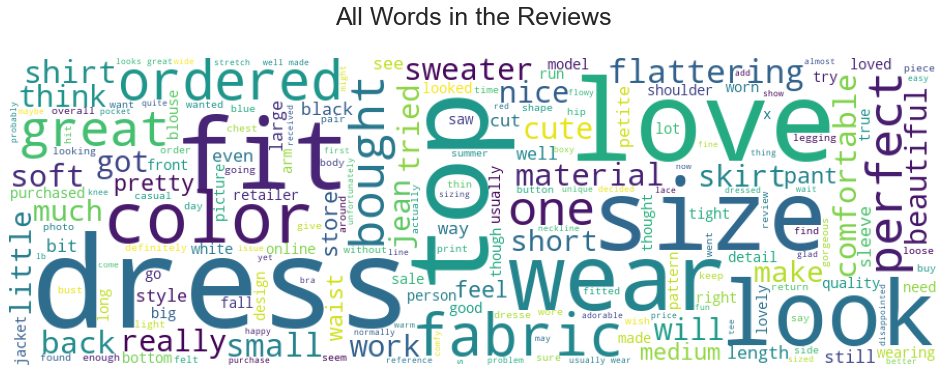

In [266]:
rt = df['Review Text']

wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

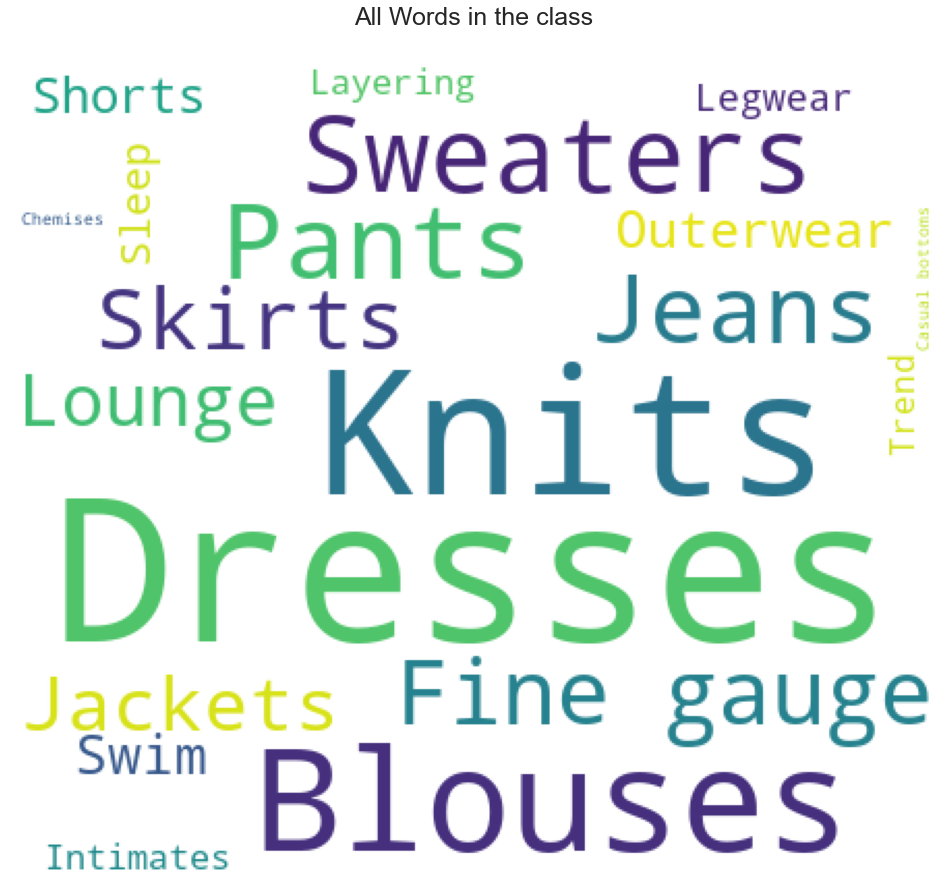

In [270]:
cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400 
                     ).generate_from_frequencies(cn)
plt.imshow(wc1)
plt.title('All Words in the class\n',size=25)
plt.axis('off')
plt.show()



In [ ]:
building sentiment analyser

Since we do not have a column which shows the sentiment as positive or negative in the dataset, 
I defined a new sentiment column. To do this, I assumed the reviews which has 4 or higher rating as positive
(True in the new dataframe) and 2 or lower rating as negative (False in the new dataframe). Also, 
I did not include the lines that has neutral ratings which are equal to 3. Following that, 
I splitted the data as training and test sets.

In [272]:
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,True
2,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,True
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",2,0,4,General,Dresses,Dresses,False
4,858,39,Cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,1,General Petite,Tops,Knits,True
5,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",4,1,4,General Petite,Tops,Knits,True


In [282]:
df.shape

(17198, 11)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              17198 non-null  int64 
 1   Age                      17198 non-null  int64 
 2   Title                    17198 non-null  object
 3   Review Text              17198 non-null  object
 4   Rating                   17198 non-null  int64 
 5   Recommended IND          17198 non-null  int64 
 6   Positive Feedback Count  17198 non-null  int64 
 7   Division Name            17198 non-null  object
 8   Department Name          17198 non-null  object
 9   Class Name               17198 non-null  object
 10  Sentiment                17198 non-null  bool  
dtypes: bool(1), int64(5), object(5)
memory usage: 1.5+ MB


In [294]:
df['Sentiment']=df['Sentiment'].astype(str)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              17198 non-null  int64 
 1   Age                      17198 non-null  int64 
 2   Title                    17198 non-null  object
 3   Review Text              17198 non-null  object
 4   Rating                   17198 non-null  int64 
 5   Recommended IND          17198 non-null  int64 
 6   Positive Feedback Count  17198 non-null  int64 
 7   Division Name            17198 non-null  object
 8   Department Name          17198 non-null  object
 9   Class Name               17198 non-null  object
 10  Sentiment                17198 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.6+ MB


In [296]:
df['Sentiment'] = df['Sentiment'].replace(["True","False"],[1,0])


In [297]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,1


In [298]:

df['Sentiment'].unique()

array([1, 0])

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17198 entries, 1 to 19661
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              17198 non-null  int64 
 1   Age                      17198 non-null  int64 
 2   Title                    17198 non-null  object
 3   Review Text              17198 non-null  object
 4   Rating                   17198 non-null  int64 
 5   Recommended IND          17198 non-null  int64 
 6   Positive Feedback Count  17198 non-null  int64 
 7   Division Name            17198 non-null  object
 8   Department Name          17198 non-null  object
 9   Class Name               17198 non-null  object
 10  Sentiment                17198 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.6+ MB


In [311]:
from sklearn.model_selection import train_test_split 



In [312]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)

In [323]:
train_data.shape

(13758, 11)

In [324]:
test_data.shape

(3440, 11)

In [315]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating the Bag of Words model 

In [316]:
vectorizer=CountVectorizer()

In [317]:
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

In [319]:
from sklearn.linear_model import LogisticRegression

In [320]:
lr = LogisticRegression()

In [321]:
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [325]:
y_pred=lr.predict(X_test)

In [326]:
from sklearn.metrics import classification_report,confusion_matrix

In [327]:
confusion_matrix(y_test,y_pred)

array([[ 238,  158],
       [  89, 2955]])

In [328]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.60      0.66       396
           1       0.95      0.97      0.96      3044

    accuracy                           0.93      3440
   macro avg       0.84      0.79      0.81      3440
weighted avg       0.92      0.93      0.93      3440



In [330]:
 from sklearn.ensemble import RandomForestClassifier

In [331]:
rf=RandomForestClassifier()

In [332]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [335]:
y_pred=rf.predict(X_test)

In [336]:
confusion_matrix(y_test,y_pred)

array([[  27,  369],
       [   1, 3043]])

In [337]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.07      0.13       396
           1       0.89      1.00      0.94      3044

    accuracy                           0.89      3440
   macro avg       0.93      0.53      0.54      3440
weighted avg       0.90      0.89      0.85      3440



In [338]:
from sklearn.svm import SVC

In [339]:
svm=SVC()

In [340]:
svm.fit(X_train,y_train)

SVC()

In [341]:
y_pred=svm.predict(X_test)

In [342]:
confusion_matrix(y_test,y_pred)

array([[ 172,  224],
       [  32, 3012]])

In [343]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.43      0.57       396
           1       0.93      0.99      0.96      3044

    accuracy                           0.93      3440
   macro avg       0.89      0.71      0.77      3440
weighted avg       0.92      0.93      0.91      3440



In [345]:
from sklearn.naive_bayes import MultinomialNB

In [346]:
nb=MultinomialNB()

In [347]:
nb.fit(X_train,y_train)

MultinomialNB()

In [348]:
y_pred=nb.predict(X_test)

In [349]:
confusion_matrix(y_test,y_pred)

array([[ 245,  151],
       [  78, 2966]])

In [350]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       396
           1       0.95      0.97      0.96      3044

    accuracy                           0.93      3440
   macro avg       0.86      0.80      0.82      3440
weighted avg       0.93      0.93      0.93      3440



In [354]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['randomforest']=rf.predict(X_train)


In [355]:
df2.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment,Logistic Regression,Naive Bayes,SVM,randomforest
15073,1094,28,Great dress for taller ones,"Overall: a super comfy dress that you can wear anywhere. short, petite ladies beware though; the dress does not hang at your natural waist like it shows in the model's photos. in order for me to have it sit at my waist, the dress was folded over and did not flatter.",4,1,0,General,Dresses,Dresses,1,1,1,1,1
195,1026,48,Perfect,I love these pants. i have worn them a number of times already this season. i am 5' so i did have to have them hemmed. i lost the bottom button in the process but there are still 3 or 4 on the pants so i don't think they look odd. i also wear very high boots with these pants so that helps. a crisp white blouse and black leather jacket and i felt like a million bucks!,5,1,1,General,Bottoms,Jeans,1,1,1,1,1
8521,1076,62,A huge miss that could've been a hit,"What a shame this dress is. i wear xl and am 5'2"", but the dress in the store in the size xs(!!!!!) looked just the right size. yup! xs was just the right size. i can't imagine anyone who wears m or s finding this dress fit flattering. it would look like a sack. it is an inch or two too short in the front for me, so i'll be returning it.",2,0,0,General,Dresses,Dresses,0,0,0,0,0
16145,868,33,Comfortably free in beautiful hues.,"This is the second top i have purchased in this design, the first being in the navy blue color. i loved the effortless swing of this shirt and the comfortable cotton texture, that i chose to purchase it in wine and have since received many compliments on both the shape and color. this is an easy top for me to put on and feel good within.",5,1,0,General,Tops,Knits,1,1,1,1,1
14876,872,37,Great top!,Fits perfectly! i don't think this is too long and i'm a shorty. great style -- wish it came in more colors - i would definitely buy again!,5,1,0,General,Tops,Knits,1,1,1,1,1
8790,1110,47,Beautiful dress,"The print on the fabric of this dress is stunning. it is lighter weight than i anticipated, and the photo didn't show the keyhole opening in the front (which i like but may not be for everyone). i am pear shaped and on the tall side, so the shape works nicely on me, not too snug in the middle or rear. not sure about someone not as tall or more busty. i typically wear a larger size on the bottom than the top, so i ordered in the larger size which fit well.",5,1,17,General,Dresses,Dresses,1,1,1,1,1
14456,825,43,Love this top,Tried this top on in store in a small and it was a bit snug in the chest (32dd) but loved it otherwise. the sales associate had it shipped to me in a medium and it is perfect!! a great length over leggings or skinny jeans and is lightweight enough for warmer days or can be layered with a tank underneath and a cropped cardigan for colder ones.,5,1,0,General,Tops,Blouses,1,1,1,1,1
8080,865,27,Cute shirt,"I love the look of this shirt. it is super soft and has a great draping quality. i personally love that the mid-stomach seem is see through, but if you didn't like that, you could easily wear a tank under it. overall good buy!",4,1,0,General,Tops,Knits,1,1,1,1,1
1815,870,39,Lovely,"I purchased this shell in black. the embellishments and construction of the top are of a good quality, like as shown. i am 5'4"", 120# and typically purchase an xs. this ran a bit bigger than i was expecting from the reviews, but i am overall happy with the top. the center slit may be too revealing for those with a smaller bust.",4,1,0,General,Tops,Knits,1,1,1,1,1
80,836,66,Excited ... but ...,"I bought this lovely silk/velvet shirt in the &quot;sky&quot; color but it is more on the teal blue side than sky blue, which disappointed me. it is definitely darker than appears in photo. still a luxurious well-made beauty with sassy appeal. it drapes like a snake slithering down your body. it comes with attitude.",5,1,0,General,To

In [359]:
print("Logistic Regression")
print(classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(classification_report(y_test, svm.predict(X_test)))
print("\n random forest (Rf)")
print(classification_report(y_test, rf.predict(X_test)))


Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       396
           1       0.95      0.97      0.96      3044

    accuracy                           0.93      3440
   macro avg       0.84      0.79      0.81      3440
weighted avg       0.92      0.93      0.93      3440


 Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       396
           1       0.95      0.97      0.96      3044

    accuracy                           0.93      3440
   macro avg       0.86      0.80      0.82      3440
weighted avg       0.93      0.93      0.93      3440


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.84      0.43      0.57       396
           1       0.93      0.99      0.96      3044

    accuracy                           0.93      3440
   macro avg       0.89      0.71      0.77      3440
weighted 

In [ ]:
Precision - Recall - F1-Score
Last but not least, I examined Precision, Recall and F1-score. They are defined as

𝐏𝐫𝐞𝐜𝐢𝐬𝐢𝐨𝐧=            𝑇𝑃
                  ----
                  𝑇𝑃+𝐹𝑃   
        
        
𝐑𝐞𝐜𝐚𝐥𝐥 =                𝑇𝑃
                    -------
                    𝑇𝑃+𝐹𝑁


 
                     2𝑇𝑃
f1 score=           -------
                   2𝑇𝑃+𝐹𝑁+𝐹𝑃

precision might be the best choice to evaluate our models beacause we want to determine ,
negative comments with less mistakes (To compare precisions, we must look at the precision values for True)
However, if we predict positive comments false, it will not have a negative impact. 
Of course for some other purposes other evaluation metrics may be useful too.


In [ ]:
Conclusion:
    
    When we look at the results of the all evaluation metrics in the evaluating models section, 
    Naive Bayes and Logistic Regression gives the best results for our analysis. Thus, 
    both of them are very effective at predicting sentiment. On the other hand, 
    it seems that Naive Bayes takes less time and when we have a bigger dataset, 
    this difference might increase and be an important advantage .

